In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import model_selection,metrics,preprocessing,feature_extraction,feature_selection,linear_model

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
sample=pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [3]:
df_train=train.drop('id',axis=1)
df_test=test.drop('id',axis=1)

<Axes: >

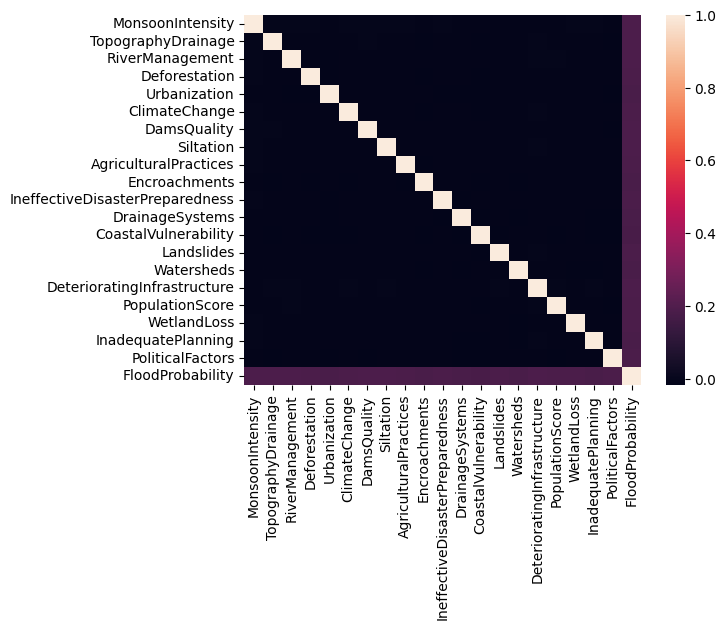

In [4]:
sns.heatmap(df_train.corr())

In [5]:
for i in df_train.columns:
    print(i,end='\n')

MonsoonIntensity
TopographyDrainage
RiverManagement
Deforestation
Urbanization
ClimateChange
DamsQuality
Siltation
AgriculturalPractices
Encroachments
IneffectiveDisasterPreparedness
DrainageSystems
CoastalVulnerability
Landslides
Watersheds
DeterioratingInfrastructure
PopulationScore
WetlandLoss
InadequatePlanning
PoliticalFactors
FloodProbability


In [6]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


<Axes: xlabel='MonsoonIntensity', ylabel='FloodProbability'>

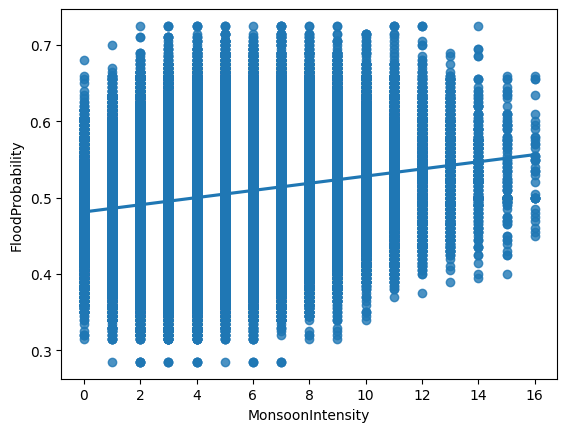

In [7]:
sns.regplot(df_train,x='MonsoonIntensity',y='FloodProbability')

In [8]:
X=df_train.drop('FloodProbability',axis=1)
y=df_train.FloodProbability
X_train,X_val,y_train,y_val=model_selection.train_test_split(X,y,test_size=.2)

In [9]:
df_train.shape

(1117957, 21)

In [10]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_val)
metrics.mean_squared_error(y_val,y_pred)

0.0004039730593807192

In [11]:
y_test=model.predict(test.drop('id',axis=1))

In [12]:
y_test.shape

(745305,)

In [13]:
sample.FloodProbability=y_test
sample.to_csv("submission.csv", index=False)
sample

,id,FloodProbability
0,1117957,0.573620
1,1117958,0.455268
2,1117959,0.454771
3,1117960,0.466199
4,1117961,0.466103
...,...,...
745300,1863257,0.477241
745301,1863258,0.449344
745302,1863259,0.624303
745303,1863260,0.551011
